In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
NUM_CLASSES = 10 #Number of classes

RESHAPED = 784 #Reshape 28*28 pixel to flatten array of 784 pixels

In [3]:
HIDDEN_NEURONS = 256

In [4]:
IMG_ROWS, IMG_COLS = 28, 28

In [5]:
fashion_data = tf.keras.datasets.fashion_mnist

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()
train_images = train_images.reshape(60000, RESHAPED)
test_images = test_images.reshape(10000, RESHAPED)

train_images, test_images = train_images/255.0, test_images/255.0


4422102/4422102 [==============================] - 0s 0us/step


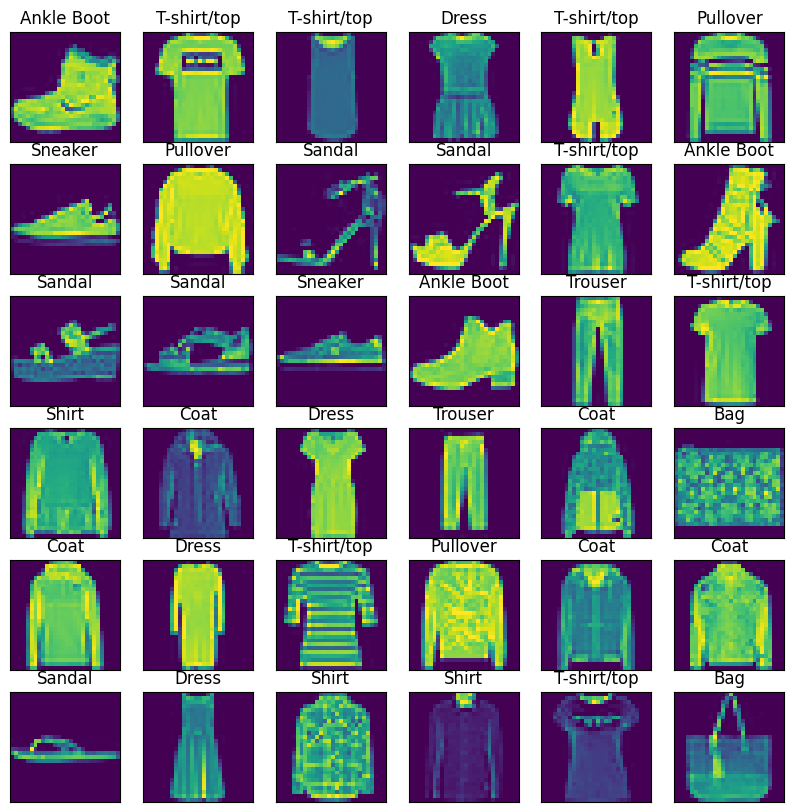

In [9]:
#Visualization

#Dict for each label

labels = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

plt.figure(figsize=(10,10))
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i].reshape((IMG_ROWS, IMG_COLS)))
  label_index = train_labels[i]
  plt.title(labels[label_index])

plt.show()

In [10]:
#one hot rerpresentations for labels

train_labels = tf.keras.utils.to_categorical(train_labels, NUM_CLASSES)
test_labels = tf.keras.utils.to_categorical(test_labels, NUM_CLASSES)

In [11]:
#Improvements to the NN, adding Hidden layers and changing activation function and optimizer

#define architecture of our CNN
class cnn_fmnist:
  @staticmethod
  def build(input_shape, classes):
    model = Sequential([
        Dense(HIDDEN_NEURONS, input_shape = input_shape, name = 'Dense_layer1', activation = 'relu'),
        Dense(HIDDEN_NEURONS, input_shape = input_shape, name = 'Dense_layer2', activation = 'relu'),
        Dense(classes, name = 'output_layer', activation = 'softmax')

    ])
    return model

In [12]:
model = cnn_fmnist.build(input_shape=(RESHAPED,), classes = NUM_CLASSES)

model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_layer1 (Dense)        (None, 256)               200960    
                                                                 
 Dense_layer2 (Dense)        (None, 256)               65792     
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# import train, optimizer, compile, train
##Train the model
#Constants

BATCH_SIZE = 128
EPOCHS = 200
VALIDATION_SPLIT = .2

history = model.fit(train_images, train_labels, batch_size= BATCH_SIZE, epochs = EPOCHS, validation_split = VALIDATION_SPLIT)

Epoch 1/200
375/375 [==============================] - 4s 4ms/step - loss: 0.5290 - accuracy: 0.8141 - val_loss: 0.4236 - val_accuracy: 0.8451
Epoch 2/200
375/375 [==============================] - 1s 4ms/step - loss: 0.3717 - accuracy: 0.8680 - val_loss: 0.3692 - val_accuracy: 0.8678
Epoch 3/200
375/375 [==============================] - 1s 4ms/step - loss: 0.3299 - accuracy: 0.8791 - val_loss: 0.3584 - val_accuracy: 0.8692
Epoch 4/200
375/375 [==============================] - 1s 4ms/step - loss: 0.3069 - accuracy: 0.8860 - val_loss: 0.3370 - val_accuracy: 0.8808
Epoch 5/200
375/375 [==============================] - 1s 4ms/step - loss: 0.2877 - accuracy: 0.8929 - val_loss: 0.3257 - val_accuracy: 0.8833
Epoch 6/200
375/375 [==============================] - 2s 4ms/step - loss: 0.2715 - accuracy: 0.8979 - val_loss: 0.3166 - val_accuracy: 0.8848
Epoch 7/200
375/375 [==============================] - 2s 5ms/step - loss: 0.2582 - accuracy: 0.9044 - val_loss: 0.3237 - val_accuracy: 0.8857

In [14]:
#Evaluation

test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy ", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.2970 - accuracy: 0.8977
Test accuracy  0.8977000117301941


Text(0.5, 1.0, 'Train - Accuracy')

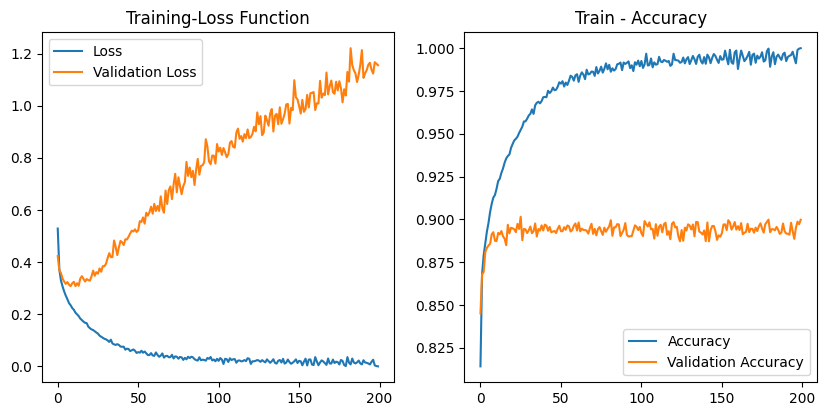

In [16]:
#Plot loss and accuracy functions for training and Validation sets


plt.figure(figsize=(10,10))
plt.subplot(2,2,1)

plt.plot(history.history['loss'], label= 'Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.title('Training-Loss Function')

plt.subplot(2,2,2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [17]:
#get predictions for the test data , convert to integer

predicted_classes = np.around(model.predict(test_images))
predicted_classes = np.argmax(predicted_classes, axis = 1)

#get indices to be plotted

test_labels = np.argmax(test_labels, axis=1)

correct = np.nonzero(predicted_classes == test_labels)[0]
incorrect = np.nonzero(predicted_classes != test_labels)[0]

313/313 [==============================] - 1s 2ms/step


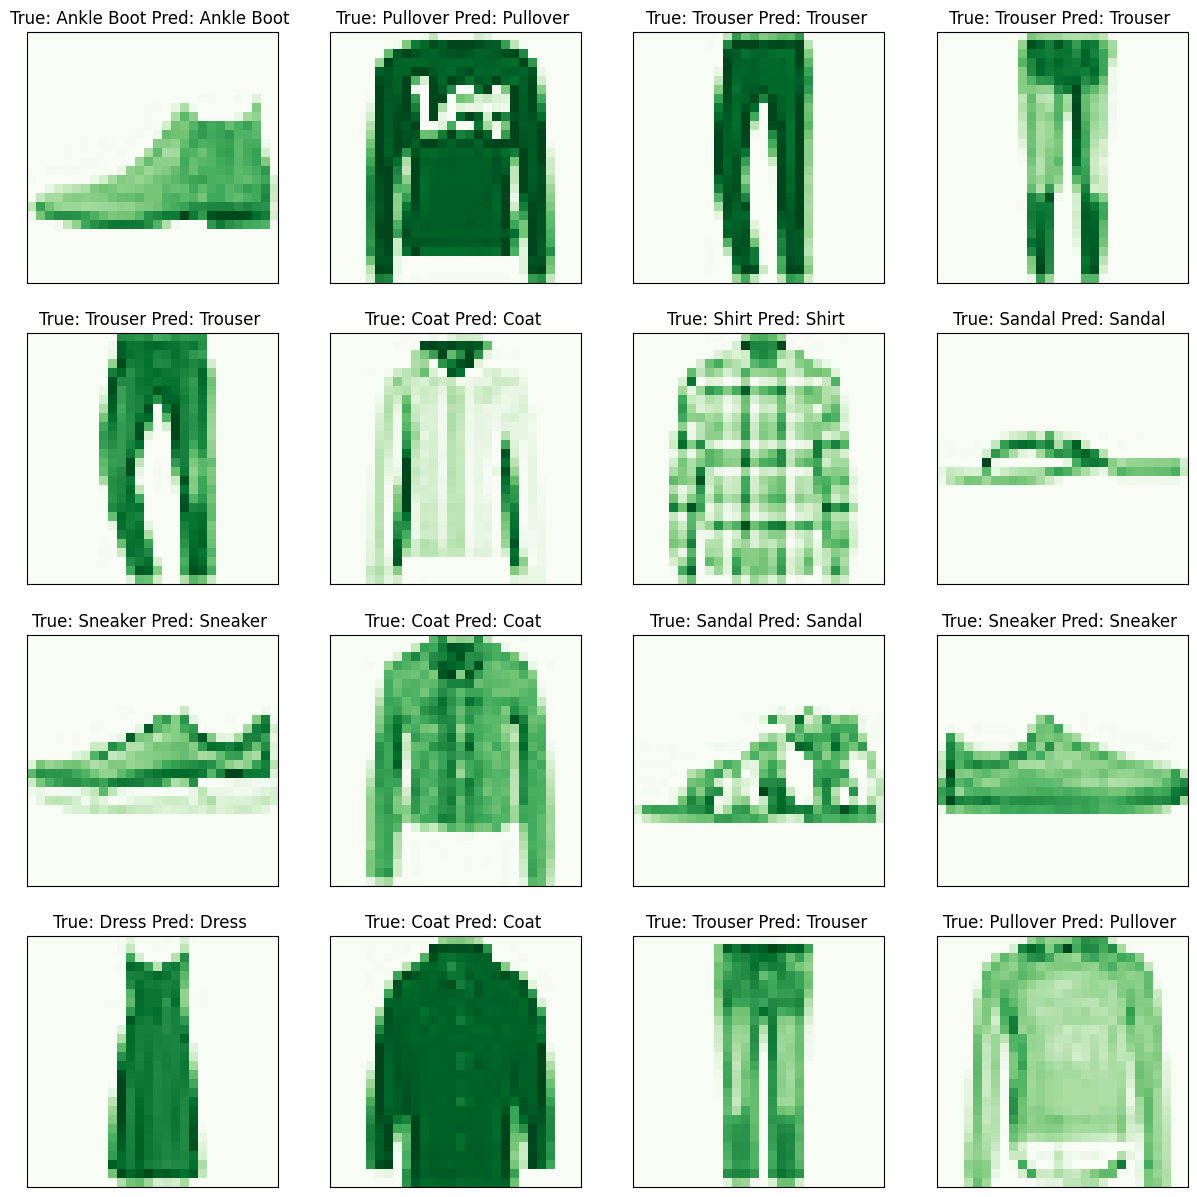

In [20]:
#Visualization

#Dict for each label


plt.figure(figsize=(15,15))
for i, indx in enumerate(correct[:16]):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[indx].reshape((IMG_ROWS, IMG_COLS)), cmap = "Greens")
  label_index = train_labels[indx]
  plt.title("True: {} Pred: {} ".format(labels[test_labels[indx]], labels[predicted_classes[indx]]))

plt.show()

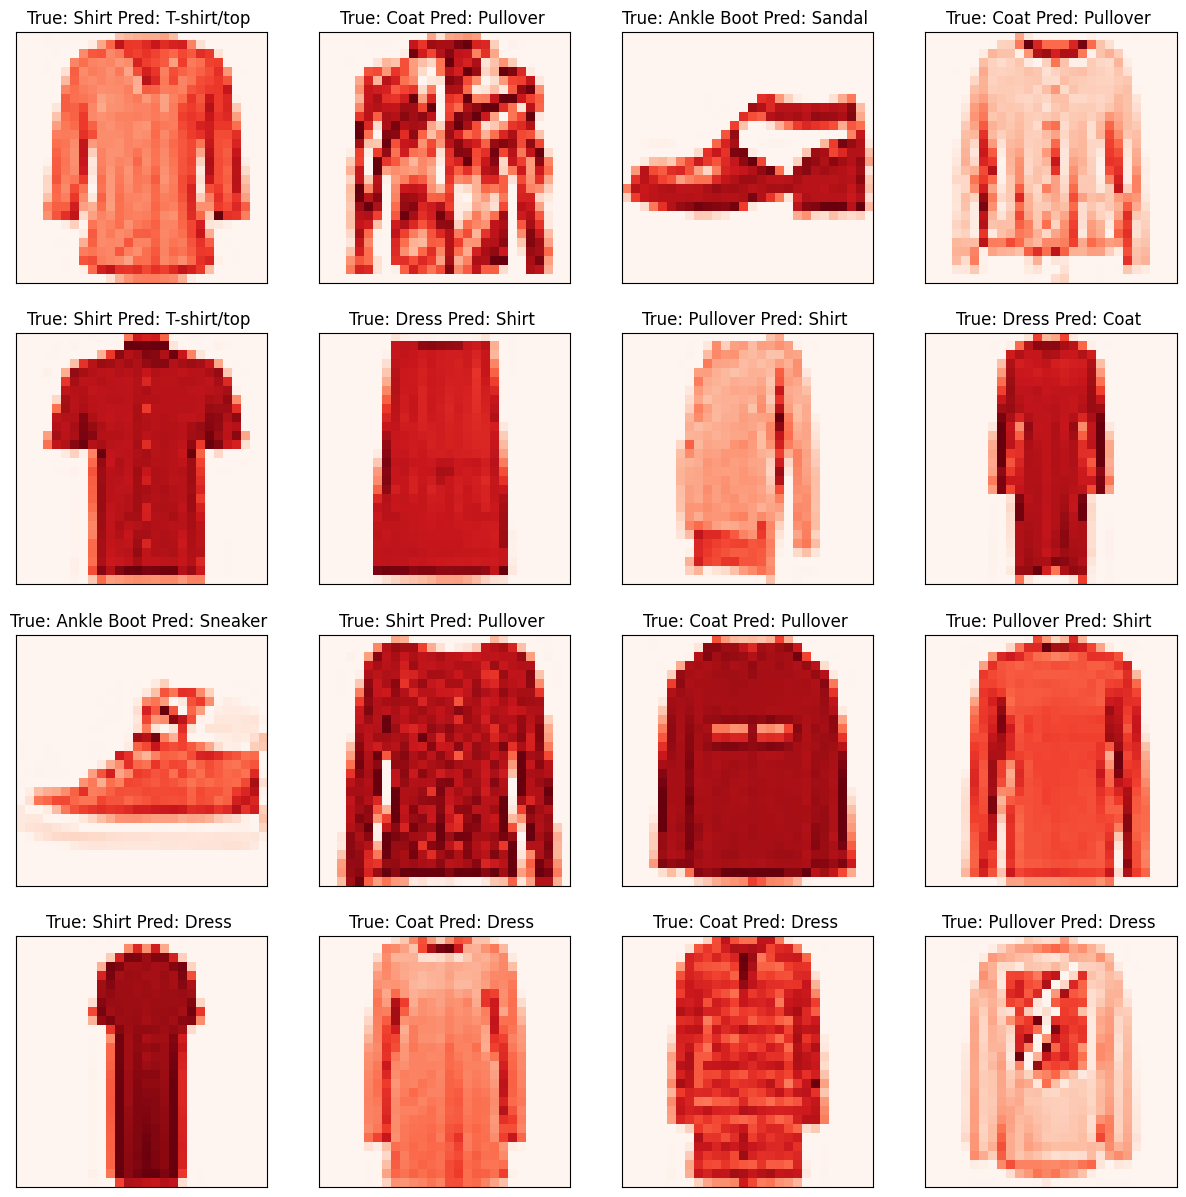

In [21]:
#Visualization

#Dict for each label


plt.figure(figsize=(15,15))
for i, indx in enumerate(incorrect[:16]):
  plt.subplot(4,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[indx].reshape((IMG_ROWS, IMG_COLS)), cmap = "Reds")
  label_index = train_labels[indx]
  plt.title("True: {} Pred: {} ".format(labels[test_labels[indx]], labels[predicted_classes[indx]]))

plt.show()